In [1]:
#
%pip install tensorflow

#
import tensorflow as tf

#
print("-----\n-----\n> The installation and import of the 'TensorFlow' package have both successfully ran!")

Note: you may need to restart the kernel to use updated packages.
-----
-----
> The installation and import of the 'TensorFlow' package have both successfully ran!


In [2]:
#
import os

#
from tensorflow.keras.applications import ResNet50V2

#
from glob import glob

#
from tensorflow.keras.layers import Flatten, Dense

#
from tensorflow.keras import Model

#
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#
import matplotlib.pyplot as plt

#
from tensorflow.keras.models import load_model

#
from tensorflow.keras.utils import load_img, img_to_array

#
import numpy as np

#
print("-----\n-----\n> The imports of other necessary packages have all sucessfully ran!")

-----
-----
> The imports of other necessary packages have all sucessfully ran!


In [19]:
#
image_resize_height = 224
image_resize_width = 224

#
image_resize_dims = [image_resize_height,image_resize_width]
print("-----\n-----\n> Any image required by our deepfake detection model will be resized to the dimensions",str(image_resize_dims))

#
print("-----\n-----\n> The definition of pixel dimensions to resize images into has successfully ran!")

-----
-----
> Any image required by our deepfake detection model will be resized to the dimensions [224, 224]
-----
-----
> The definition of pixel dimensions to resize images into has successfully ran!


In [21]:
#
project_root_directory = os.path.dirname(os.path.dirname(os.getcwd()))

#
data_sample_parent_subdirectory = os.path.join(project_root_directory,"I__Extract-Of-Random-Sample-Data","Data-Sample")

#
test_images_subdir_path = os.path.join(data_sample_parent_subdirectory,"Test-Data")
train_images_subdir_path = os.path.join(data_sample_parent_subdirectory,"Train-Data")
validation_images_subdir_path = os.path.join(data_sample_parent_subdirectory,"Validation-Data")

#
print("-----\n-----\n> The definition of folder paths, for different subgroups of sample data, has successfully ran!")

-----
-----
> The definition of folder paths, for different subgroups of sample data, has successfully ran!


In [5]:
#
def count_images_from_sample_data(path_parameter):
    for folder in os.listdir(path_parameter):
        folder_path = os.path.join(str(path_parameter),folder)
        folder_image_count = 0
        for image in os.listdir(folder_path):
            folder_image_count += 1
        print(str(folder_image_count),"images in\t"+folder_path)

#
count_images_from_sample_data(train_images_subdir_path)
count_images_from_sample_data(validation_images_subdir_path)
count_images_from_sample_data(test_images_subdir_path)

#
print("-----\n-----\n> The countings of data sample images have successfully ran!")

240 images in	C:\Users\Student\18382079-YZ__6COSC023W-FYP\I__Extract-Of-Random-Sample-Data\Data-Sample\Train-Data\Fake
240 images in	C:\Users\Student\18382079-YZ__6COSC023W-FYP\I__Extract-Of-Random-Sample-Data\Data-Sample\Train-Data\Real
30 images in	C:\Users\Student\18382079-YZ__6COSC023W-FYP\I__Extract-Of-Random-Sample-Data\Data-Sample\Validation-Data\Fake
30 images in	C:\Users\Student\18382079-YZ__6COSC023W-FYP\I__Extract-Of-Random-Sample-Data\Data-Sample\Validation-Data\Real
30 images in	C:\Users\Student\18382079-YZ__6COSC023W-FYP\I__Extract-Of-Random-Sample-Data\Data-Sample\Test-Data\Fake
30 images in	C:\Users\Student\18382079-YZ__6COSC023W-FYP\I__Extract-Of-Random-Sample-Data\Data-Sample\Test-Data\Real
-----
-----
> The countings of data sample images have successfully ran!


In [6]:
#
model_component_resnet50v2 = ResNet50V2(
    input_shape=image_resize_dims+[3],
    weights="imagenet",
    include_top=False
)

#
print("-----\n-----\n> The creation of a ResNet50V2 model, which will form part of a larger model, has successfully ran!")

-----
-----
> The creation of a ResNet50V2 model, which will form part of a larger model, has successfully ran!


In [7]:
#
print(model_component_resnet50v2.summary())

#
print("-----\n-----\n> The output for the summary of the ResNet50V2 submodel has successfully ran!")

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 56, 56, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 56, 56, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 58, 58, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

None
-----
-----
> The output for the summary of the ResNet50V2 submodel has successfully ran!


In [8]:
#
for layer in model_component_resnet50v2.layers:
    layer.trainable = False

#
print("-----\n-----\n> The modifications, for the ResNet50V2 submodel's layers to be un-trainable, have successfully ran!")

-----
-----
> The modifications, for the ResNet50V2 submodel's layers to be un-trainable, have successfully ran!


In [9]:
#
train_subdir_path_glob = os.path.join(train_images_subdir_path,"*")

#
number_of_classes = len(glob(train_subdir_path_glob))
print("-----\n-----\n> The number of classes that our final model must classify between is",str(number_of_classes))

#
print("-----\n-----\n> The calculation of how many classes our final model must classify between has successfully ran!")

-----
-----
> The number of classes that our final model must classify between is 2
-----
-----
> The calculation of how many classes our final model must classify between has successfully ran!


In [10]:
#
added_layer_flatten = Flatten()(model_component_resnet50v2.output)

#
added_layer_dense = Dense(number_of_classes,activation="softmax")(added_layer_flatten)

#
print("-----\n-----\n> The definition of additional layers, to be included in our final model, has successfully ran!")

-----
-----
> The definition of additional layers, to be included in our final model, has successfully ran!


In [11]:
#
deepfake_detection_overall_model = Model(
    inputs=model_component_resnet50v2.input,
    outputs=added_layer_dense
)

#
print("-----\n-----\n> The creation of our final deepfake detection model, made of the ResNet50V2 submodel and additional layers, has successfully ran!")

-----
-----
> The creation of our final deepfake detection model, made of the ResNet50V2 submodel and additional layers, has successfully ran!


In [12]:
#
print(deepfake_detection_overall_model.summary())

#
print("-----\n-----\n> The output for the summary of our final model has successfully ran!")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 56, 56, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 56, 56, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 58, 58, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,765,506 (90.66 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

None
-----
-----
> The output for the summary of our final model has successfully ran!


In [13]:
#
deepfake_detection_overall_model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

#
print("-----\n-----\n> The compilation of our final model has successfully ran!")

-----
-----
> The compilation of our final model has successfully ran!


In [23]:
#
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

#
print("-----\n-----\n> The creation of an initial data generator, specifically for train images, has successfully ran!")

-----
-----
> The creation of an initial data generator, specifically for train images, has successfully ran!


In [15]:
#
validation_data_generator = ImageDataGenerator(
    rescale=1./255
)

#
print("-----\n-----\n> The creation of an initial data generator, specifically for validation images, has successfully ran!")

-----
-----
> The creation of an initial data generator, specifically for validation images, has successfully ran!


In [25]:
#
train_set_transformed = train_data_generator.flow_from_directory(
    train_images_subdir_path,
    target_size=(image_resize_height,image_resize_width),
    batch_size=32,
    class_mode="categorical"
)

#
print("-----\n-----\n> The creation of a further generator, specifically for transformed train images, has successfully ran!")

Found 480 images belonging to 2 classes.
-----
-----
> The creation of a further generator, specifically for transformed train images, has successfully ran!


In [17]:
#
validation_set_transformed = validation_data_generator.flow_from_directory(
    validation_images_subdir_path,
    target_size=(image_resize_height,image_resize_width),
    batch_size=32,
    class_mode="categorical"
)

#
print("-----\n-----\n> The creation of a further generator, specifically for transformed validation images, has successfully ran!")

Found 60 images belonging to 2 classes.
-----
-----
> The creation of a further generator, specifically for transformed validation images, has successfully ran!


In [18]:
#
model_training_history = deepfake_detection_overall_model.fit(
    train_set_transformed,
    validation_data=validation_set_transformed,
    epochs=50,
    steps_per_epoch=len(train_set_transformed),
    validation_steps=len(validation_set_transformed)
)

#
print("-----\n-----\n> The training of our final model has successfully ran!")

C:\Users\Student\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5987 - loss: 4.0688 - val_accuracy: 0.6667 - val_loss: 3.1906
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8074 - loss: 1.6393 - val_accuracy: 0.7167 - val_loss: 2.8853
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8475 - loss: 1.0049 - val_accuracy: 0.7500 - val_loss: 4.0122
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9088 - loss: 0.5286 - val_accuracy: 0.7333 - val_loss: 2.3452
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9010 - loss: 0.9491 - val_accuracy: 0.7333 - val_loss: 3.2538
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9688 - loss: 0.2794 - val_accuracy: 0.7333 - val_loss: 2.9302
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9308 - loss: 0.4257 - val_accuracy: 0.7167 - val_loss: 2.7688
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9406 - loss: 0.4167 - val_accuracy: 0.7167 - val_loss:

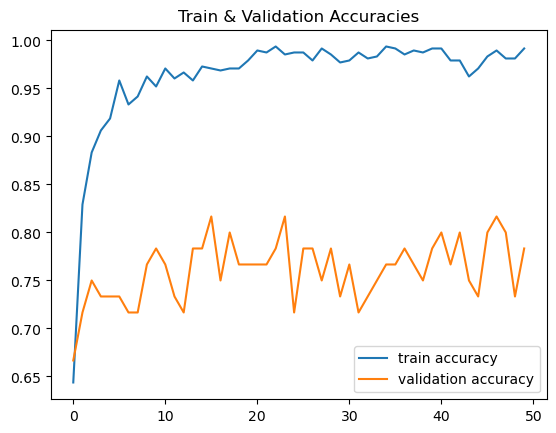

-----
-----
> The creation of a graph, which describes our final model's performance metric of accuracy, has successfully ran!


In [19]:
#
plt.plot(model_training_history.history["accuracy"],label="train accuracy")
plt.plot(model_training_history.history["val_accuracy"],label="validation accuracy")
plt.title("Train & Validation Accuracies")
plt.legend()
plt.show()

#
print("-----\n-----\n> The creation of a graph, which describes our final model's performance metric of accuracy, has successfully ran!")

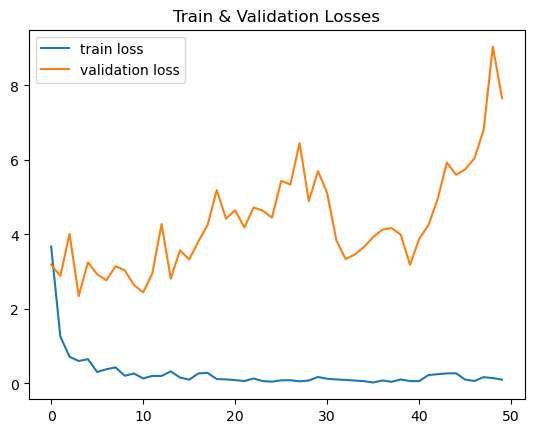

-----
-----
> The creation of a graph, which describes our final model's performance metric of loss, has successfully ran!


In [20]:
#
plt.plot(model_training_history.history["loss"],label="train loss")
plt.plot(model_training_history.history["val_loss"],label="validation loss")
plt.title("Train & Validation Losses")
plt.legend()
plt.show()

#
print("-----\n-----\n> The creation of a graph, which describes our final model's performance metric of loss, has successfully ran!")

In [21]:
#
deepfake_detection_overall_model.save("08.03.2025-YZ__ResNet50V2-Model.keras")

#
print("-----\n-----\n> The saving of our final model, into specifically a '.keras' file, has successfully ran!")

-----
-----
> The saving of our final model, into specifically a '.keras' file, has successfully ran!


In [27]:
#
deepfake_detection_loaded_model = load_model("08.03.2025-YZ__ResNet50V2-Model.keras")

#
print("-----\n-----\n> The loading of our final model, from a '.keras' file, has successfully ran!")

-----
-----
> The loading of our final model, from a '.keras' file, has successfully ran!


In [28]:
#
print(deepfake_detection_loaded_model.summary())

#
print("-----\n-----\n> The output for the summary of our loaded model has successfully ran!")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 56, 56, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 56, 56, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 58, 58, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 24,166,920 (92.19 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 401,414 (1.53 MB)

None
-----
-----
> The output for the summary of our loaded model has successfully ran!


-----
-----
> The preprocessing of an image, from the test subgroup of sample data, has successfully ran!


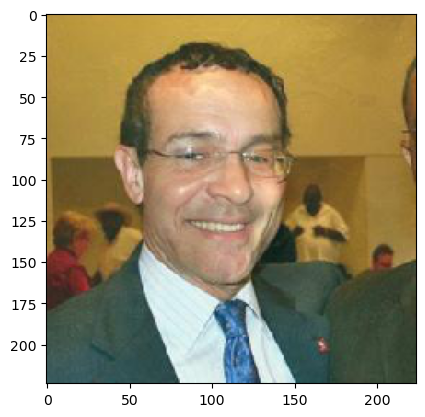

In [55]:
#
project_root_directory = os.path.dirname(os.path.dirname(os.getcwd()))
data_sample_parent_subdirectory = os.path.join(project_root_directory,"I__Extract-Of-Random-Sample-Data","Data-Sample")

#
test_individual_image_path = os.path.join(data_sample_parent_subdirectory,"Test-Data","Fake","fake_1916.jpg")

#
test_individual_image_loaded = load_img(test_individual_image_path,target_size=(224,224))

#
plt.imshow(test_individual_image_loaded)

#
test_individual_image_array = img_to_array(test_individual_image_loaded)

#
test_individual_image_expanded = np.expand_dims(test_individual_image_array,axis=0)

#
test_individual_image_divided = test_individual_image_expanded / 255.

#
print("-----\n-----\n> The preprocessing of an image, from the test subgroup of sample data, has successfully ran!")

In [56]:
#
test_prediction = deepfake_detection_loaded_model.predict(test_individual_image_divided)

#
test_prediction_class_index = np.argmax(test_prediction)

#
test_prediction_class_name = [k for k,v in train_set_transformed.class_indices.items() if v==test_prediction_class_index][0]

#
print("-----\n-----\n> The class of the given test image is predicted to be:",test_prediction_class_name)

#
print("-----\n-----\n> The prediction of an image, from the test subgroup of sample data, has successfully ran!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
-----
-----
> The class of the given test image is predicted to be: Fake
-----
-----
> The prediction of an image, from the test subgroup of sample data, has successfully ran!
